# Alzheimers


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import CSVLogger, ModelCheckpoint, TensorBoard
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, ReLU, Softmax
from keras.losses import CategoricalCrossentropy
from keras.metrics import CategoricalAccuracy
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import image_dataset_from_directory, plot_model

In [2]:
class_names = ["MildDemented", "ModerateDemented", "NonDemented", "VeryMildDemented"]

In [3]:
train_ds = image_dataset_from_directory(
    directory="../dataset/train/",
    labels="inferred",
    label_mode="categorical",
    class_names=class_names,
    color_mode="grayscale",
    batch_size=64,
    image_size=(200, 200),
    seed=0,
    validation_split=0.2,
    subset="training",
)

val_ds = image_dataset_from_directory(
    directory="../dataset/train/",
    labels="inferred",
    label_mode="categorical",
    class_names=class_names,
    color_mode="grayscale",
    batch_size=64,
    image_size=(200, 200),
    seed=0,
    validation_split=0.2,
    subset="validation",
)

test_ds = image_dataset_from_directory(
    directory="../dataset/test/",
    labels="inferred",
    label_mode="categorical",
    class_names=class_names,
    color_mode="grayscale",
    batch_size=64,
    image_size=(200, 200),
    seed=0,
)

Found 5121 files belonging to 4 classes.
Using 4097 files for training.
Found 5121 files belonging to 4 classes.
Using 1024 files for validation.
Found 1279 files belonging to 4 classes.


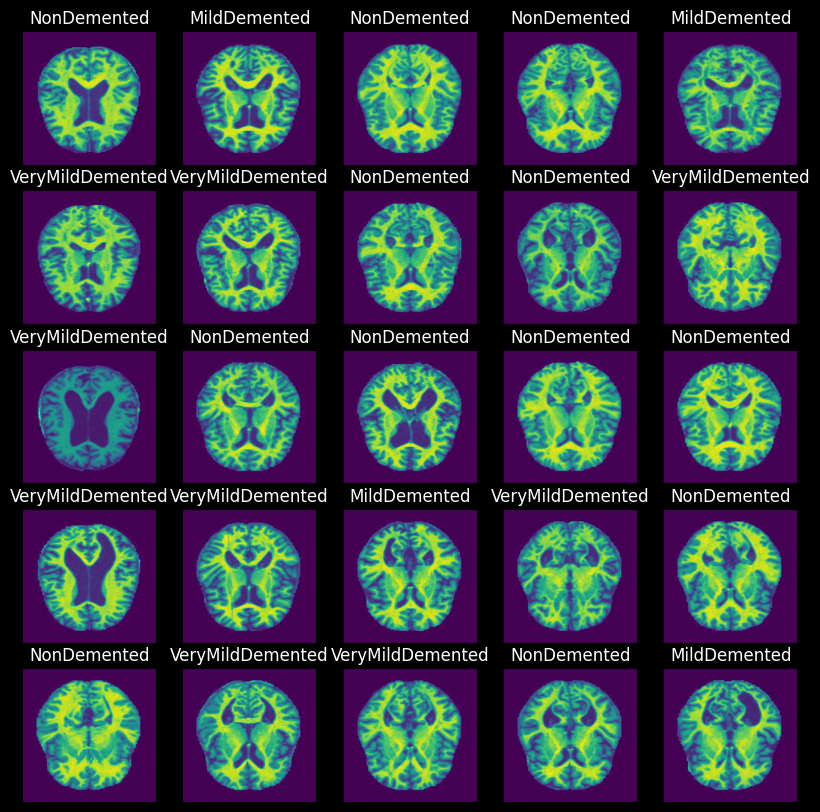

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    num_images = images.shape[0]
    for i in range(min(num_images, 25)):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("float32") / 255.0)
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
plt.savefig("Images/sample.png", bbox_inches="tight")
plt.show()

In [7]:
alzheimers = Sequential(
    layers=[
        Input(shape=(200, 200, 1)),
        Conv2D(filters=32, kernel_size=3, padding="same", strides=1),
        ReLU(),
        MaxPooling2D(pool_size=2, strides=2),
        Conv2D(filters=64, kernel_size=3, padding="same", strides=1),
        ReLU(),
        MaxPooling2D(pool_size=2, strides=2),
        Flatten(),
        Dense(128),
        ReLU(),
        Dense(4),
        Softmax(),
    ],
    name="alzheimers_cnn",
)

In [8]:
alzheimers.layers

[<Conv2D name=conv2d, built=True>,
 <ReLU name=re_lu, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <ReLU name=re_lu_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <ReLU name=re_lu_2, built=True>,
 <Dense name=dense_1, built=True>,
 <Softmax name=softmax, built=True>]

In [9]:
alzheimers.summary()

Model: "alzheimers_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 200, 200, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 160000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    20,480,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,499,460 (78.20 MB)

 Trainable params: 20,499,460 (78.20 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
alzheimers.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),
    metrics=[CategoricalAccuracy()],
)

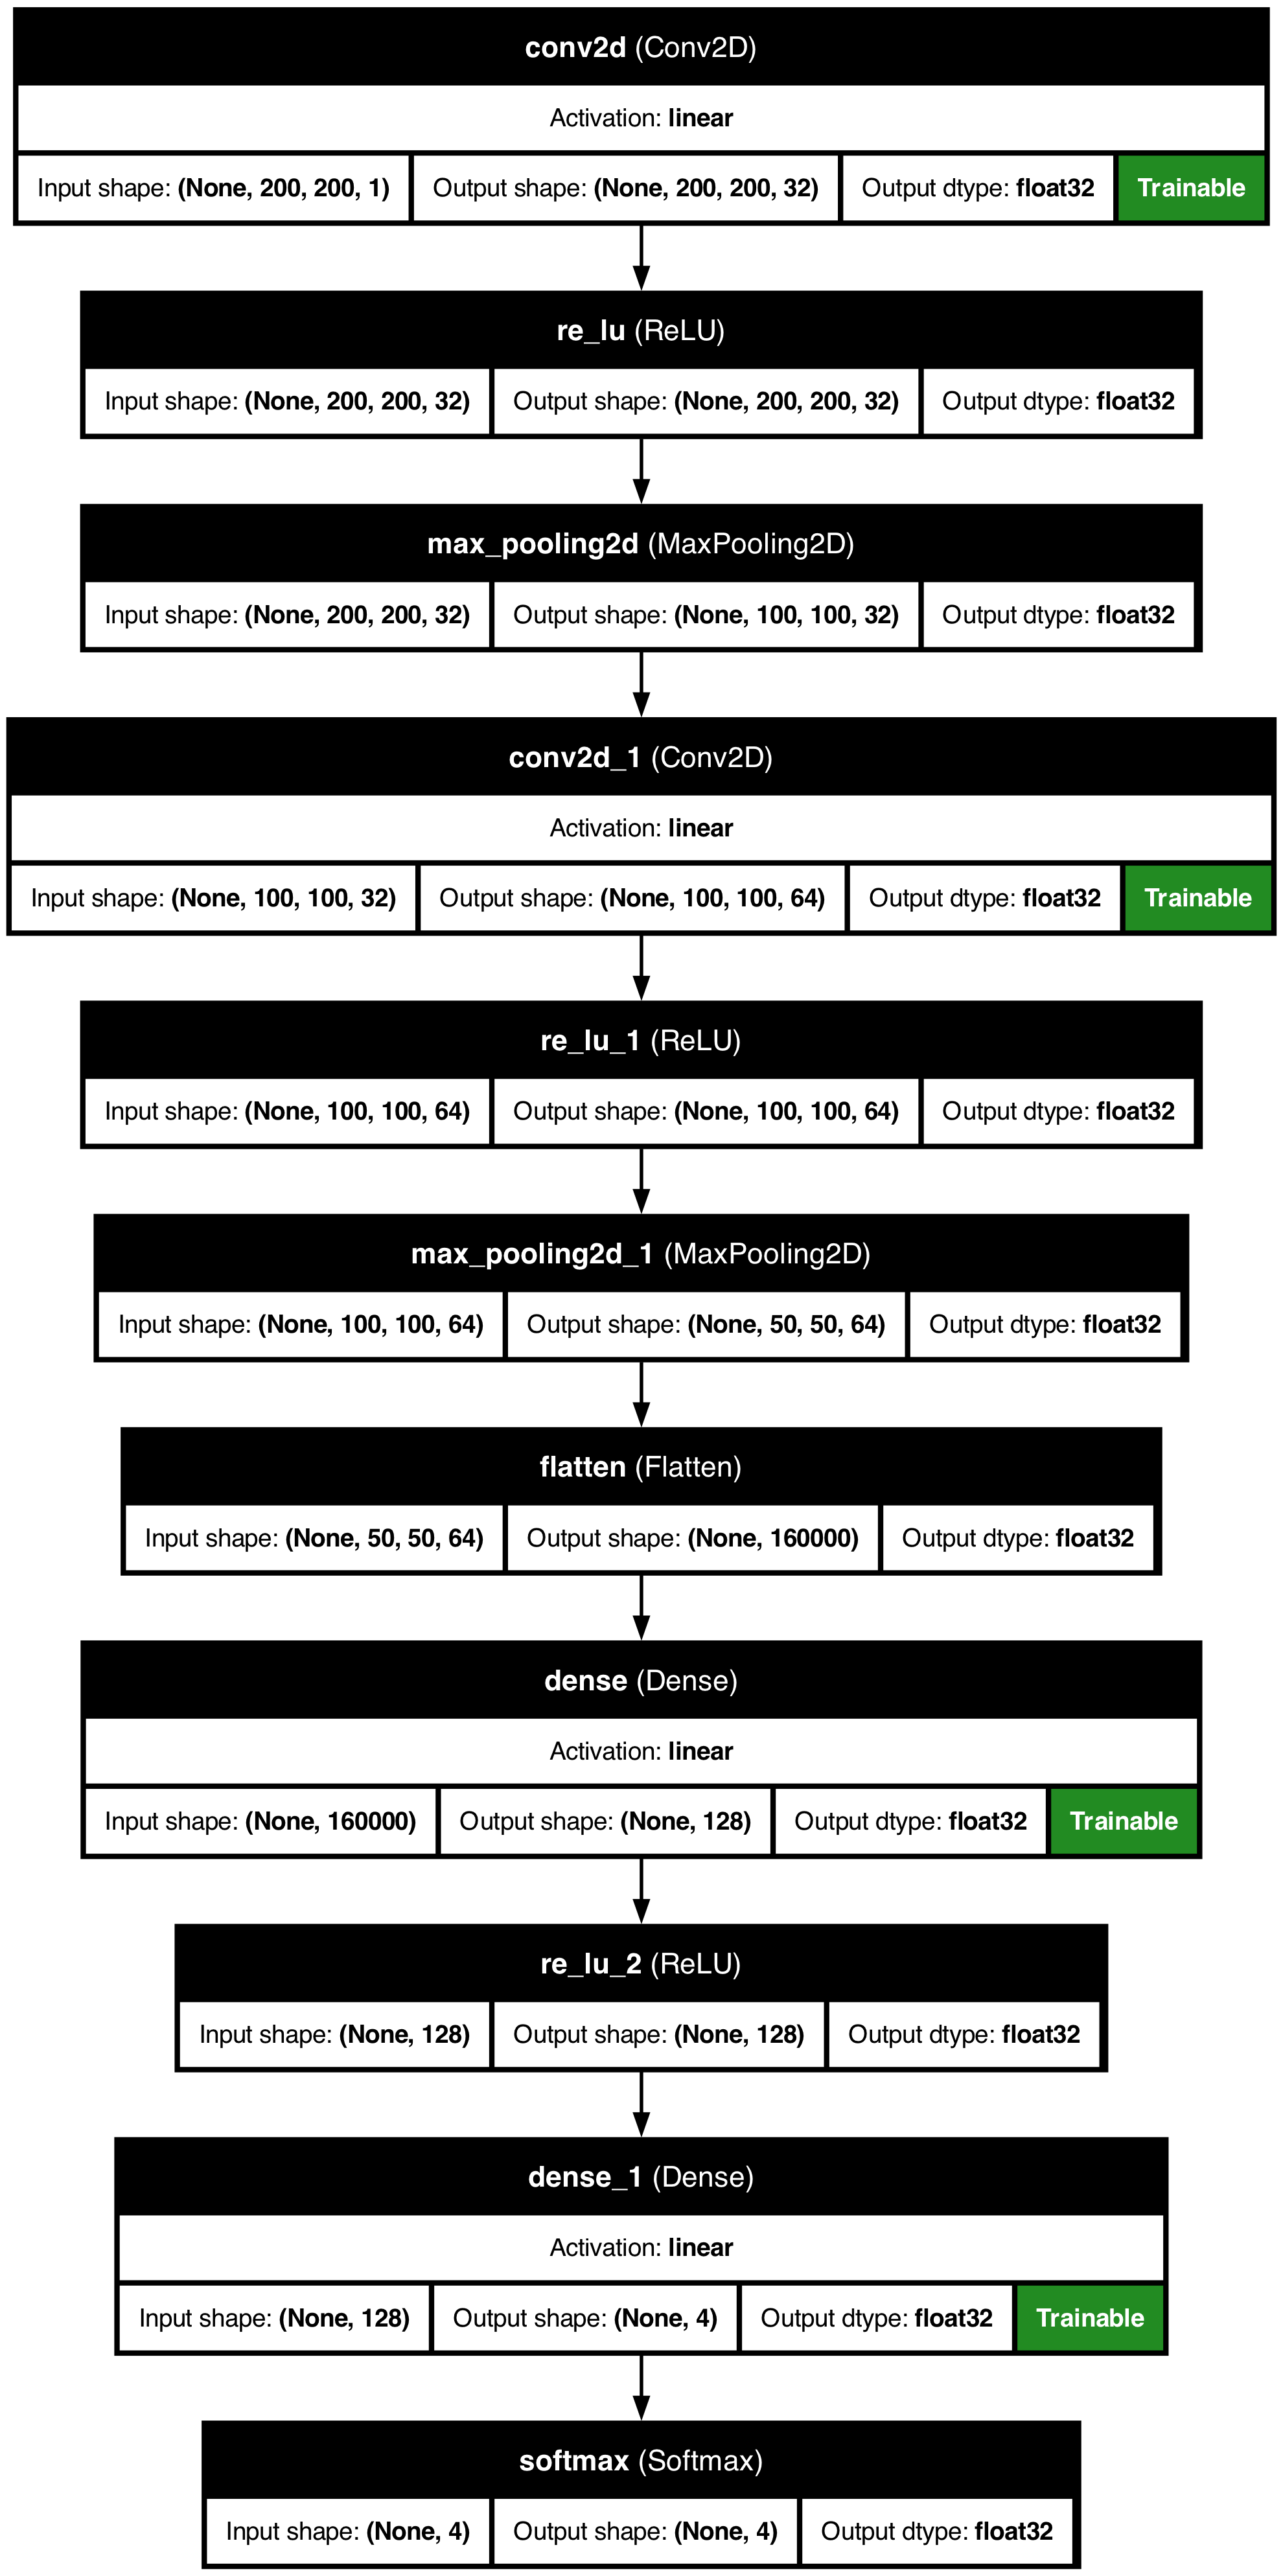

In [12]:
plot_model(
    alzheimers,
    to_file="Images/alzheimers_cnn.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    show_layer_activations=True,
    show_trainable=True,
)

In [ ]:
alzheimers_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/alzheimers_cnn.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
)
alzheimers_tensorboard_callback = TensorBoard(
    log_dir="../Logs",
    histogram_freq=1,
    write_images=True,
    write_steps_per_second=True,
)
# tensorboard --logdir="Logs"

alzheimers_csvlogger_callback = CSVLogger(
    "../Logs/alzheimers_cnn_logs.csv"
)

alzheimers_history = alzheimers.fit(
    train_ds,
    batch_size=64,
    epochs=10,
    validation_data=val_ds,
    callbacks=[
        alzheimers_checkpoint_callback,
        alzheimers_tensorboard_callback,
        alzheimers_csvlogger_callback,
    ],
)

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - categorical_accuracy: 0.4195 - loss: 194.8218 - val_categorical_accuracy: 0.5156 - val_loss: 0.9765
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 59s 916ms/step - categorical_accuracy: 0.5376 - loss: 0.9397 - val_categorical_accuracy: 0.6289 - val_loss: 0.8073
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 62s 962ms/step - categorical_accuracy: 0.6587 - loss: 0.7530 - val_categorical_accuracy: 0.7402 - val_loss: 0.5876
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - categorical_accuracy: 0.8076 - loss: 0.4644 - val_categorical_accuracy: 0.6133 - val_loss: 0.9002
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - categorical_accuracy: 0.7492 - loss: 0.6252 - val_categorical_accuracy: 0.8584 - val_loss: 0.3549
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - categorical_accuracy: 0.9205 - loss: 0.2192 - val_categorical_accuracy: 0.8662 - val_loss: 0.2820
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 61s 947ms/step - categorical_accuracy: 0.9663 - loss: 

In [14]:
alzheimers_train_loss = alzheimers_history.history["loss"]
alzheimers_train_acc = alzheimers_history.history["categorical_accuracy"]
alzheimers_val_loss = alzheimers_history.history["val_loss"]
alzheimers_val_acc = alzheimers_history.history["val_categorical_accuracy"]


print("Training loss:", np.mean(alzheimers_train_loss))
print("Validation loss:", np.mean(alzheimers_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(alzheimers_train_acc), np.std(alzheimers_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(alzheimers_val_acc), np.std(alzheimers_val_acc))
)

Training loss: 6.452414858806878
Validation loss: 0.4403583347797394
0.830779 Training accuracy with a standard deviation of 0.181153
0.804492 Validation accuracy with a standard deviation of 0.159280


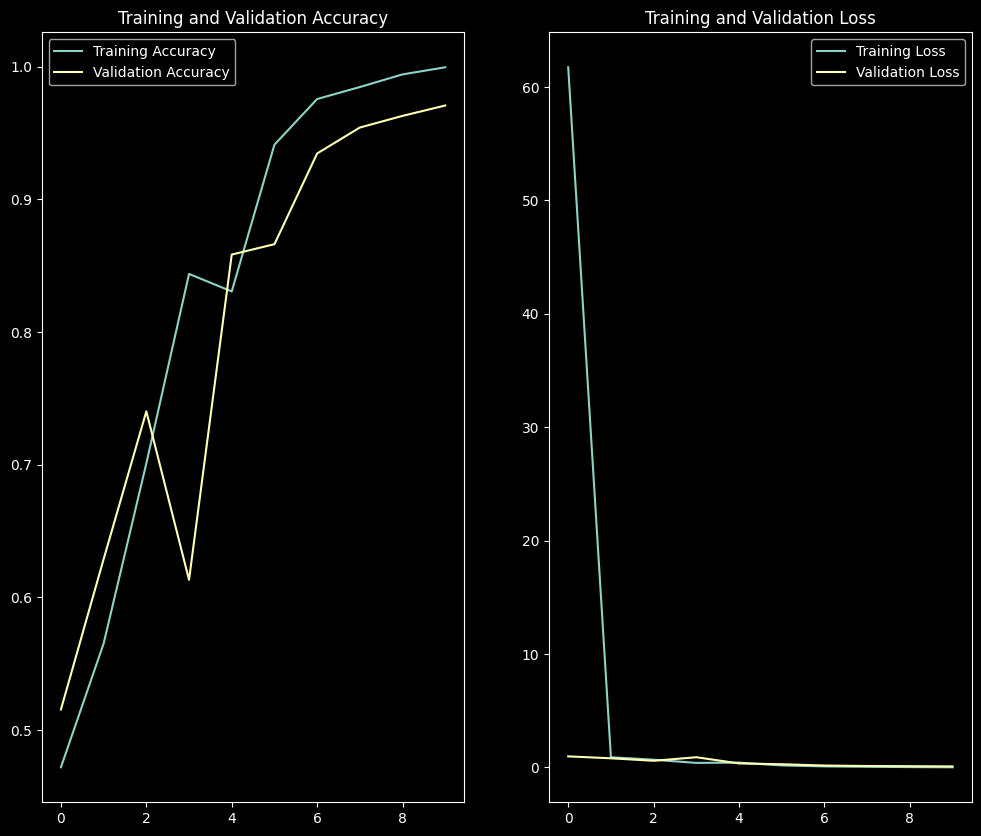

In [15]:
epochs_range = range(10)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, alzheimers_train_acc, label="Training Accuracy")
plt.plot(epochs_range, alzheimers_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, alzheimers_train_loss, label="Training Loss")
plt.plot(epochs_range, alzheimers_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("Images/alzheimers_acc_loss.png", bbox_inches="tight")

In [16]:
alzheimers_test_loss, alzheimers_test_accuracy = alzheimers.evaluate(test_ds)
print("Test loss:", alzheimers_test_loss)
print("Test accuracy:", alzheimers_test_accuracy)

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 225ms/step - categorical_accuracy: 0.5401 - loss: 2.4186
Test loss: 2.332735776901245
Test accuracy: 0.551993727684021


In [17]:
y_pred = alzheimers.predict(test_ds)

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 231ms/step
